## Kaggle旧金山犯罪类型分类问题，地址请戳[我](https://www.kaggle.com/c/sf-crime)
我有一篇[博客](http://blog.csdn.net/han_xiaoyang/article/details/50629608)里提到了用朴素贝叶斯解决这个问题，有兴趣可以看看(当然后续李老师会给大家详细介绍到朴素贝叶斯)，这里我们尝试用logistic regression来完成这个预测问题。<br>

寒小阳(hanxiaoyang.ml@gmail.com)<br>
2016-06

## 问题的背景大概是这样
From 1934 to 1963, San Francisco was infamous for housing some of the world's most notorious criminals on the inescapable island of Alcatraz.

Today, the city is known more for its tech scene than its criminal past. But, with rising wealth inequality, housing shortages, and a proliferation of expensive digital toys riding BART to work, there is no scarcity of crime in the city by the bay.

From Sunset to SOMA, and Marina to Excelsior, this competition's dataset provides nearly 12 years of crime reports from across all of San Francisco's neighborhoods. Given time and location, you must predict the category of crime that occurred.

We're also encouraging you to explore the dataset visually. What can we learn about the city through visualizations like this Top Crimes Map? The top most up-voted scripts from this competition will receive official Kaggle swag as prizes. 
### 数据大概长这样
This dataset contains incidents derived from SFPD Crime Incident Reporting system. The data ranges from 1/1/2003 to 5/13/2015. The training set and test set rotate every week, meaning week 1,3,5,7... belong to test set, week 2,4,6,8 belong to training set. 
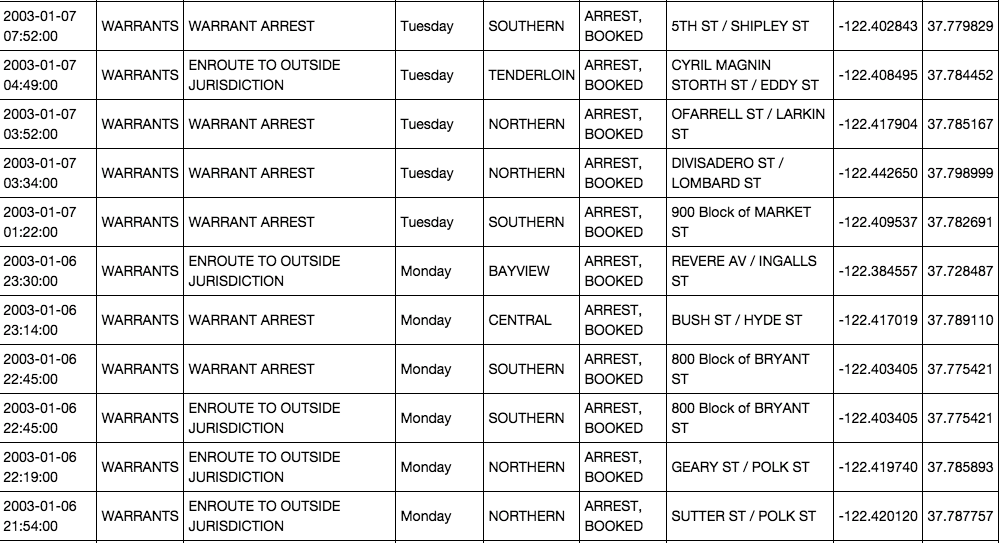


Data fields

Dates - timestamp of the crime incident

Category - category of the crime incident (only in train.csv). This is the target variable you are going to predict.

Descript - detailed description of the crime incident (only in train.csv)

DayOfWeek - the day of the week

PdDistrict - name of the Police Department District

Resolution - how the crime incident was resolved (only in train.csv)

Address - the approximate street address of the crime incident 

X - Longitude

Y - Latitude





In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np

# 先了解自己的数据
train = pd.read_csv('sf_data/train.csv', parse_dates=['Dates'])
test = pd.read_csv('sf_data/test.csv', parse_dates=['Dates'])

train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [5]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [7]:
all_addr = np.array(train.Address.tolist() + test.Address.tolist())

list(all_addr)

['OAK ST / LAGUNA ST',
 'OAK ST / LAGUNA ST',
 'VANNESS AV / GREENWICH ST',
 '1500 Block of LOMBARD ST',
 '100 Block of BRODERICK ST',
 '0 Block of TEDDY AV',
 'AVALON AV / PERU AV',
 'KIRKWOOD AV / DONAHUE ST',
 '600 Block of 47TH AV',
 'JEFFERSON ST / LEAVENWORTH ST',
 'JEFFERSON ST / LEAVENWORTH ST',
 '0 Block of ESCOLTA WY',
 'TURK ST / JONES ST',
 'FILLMORE ST / GEARY BL',
 '200 Block of WILLIAMS AV',
 '0 Block of MENDELL ST',
 'EDDY ST / JONES ST',
 'GODEUS ST / MISSION ST',
 'MENDELL ST / HUDSON AV',
 '100 Block of JONES ST',
 '200 Block of EVELYN WY',
 '1600 Block of VALENCIA ST',
 '100 Block of JONES ST',
 '100 Block of JONES ST',
 'FILLMORE ST / LOMBARD ST',
 '300 Block of OFARRELL ST',
 '2000 Block of BUSH ST',
 '500 Block of COLLEGE AV',
 '19TH AV / SANTIAGO ST',
 '2000 Block of 41ST AV',
 '1300 Block of WEBSTER ST',
 '400 Block of CASTRO ST',
 '1500 Block of FILLMORE ST',
 '1600 Block of WEBSTER ST',
 '1600 Block of WEBSTER ST',
 'KING ST / 3RD ST',
 'VALLEJO ST / BUCHANAN

In [9]:
stop_words = ['dr', 'wy', 'bl', 'av', 'st', 'ct', 'ln', 'block', 'of']
vectorizer = CountVectorizer(max_features=300, stop_words=stop_words)
features = vectorizer.fit_transform(all_addr).toarray()
features[0,:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [10]:
X = features[:train.shape[0]]
y = train.Category

In [11]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
y

0                       WARRANTS
1                 OTHER OFFENSES
2                 OTHER OFFENSES
3                  LARCENY/THEFT
4                  LARCENY/THEFT
5                  LARCENY/THEFT
6                  VEHICLE THEFT
7                  VEHICLE THEFT
8                  LARCENY/THEFT
9                  LARCENY/THEFT
10                 LARCENY/THEFT
11                OTHER OFFENSES
12                     VANDALISM
13                 LARCENY/THEFT
14                  NON-CRIMINAL
15                  NON-CRIMINAL
16                       ROBBERY
17                       ASSAULT
18                OTHER OFFENSES
19                  NON-CRIMINAL
20                 LARCENY/THEFT
21                       ROBBERY
22                      WARRANTS
23                  NON-CRIMINAL
24                 LARCENY/THEFT
25                  NON-CRIMINAL
26                 LARCENY/THEFT
27                 LARCENY/THEFT
28                 LARCENY/THEFT
29                OTHER OFFENSES
          

In [13]:
#分成80%的训练集和20%的验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

log_model = LogisticRegression().fit(X=X_train, y=y_train)

results = log_model.predict_proba(X_test)

np.round(results[1], 3)

array([ 0.001,  0.053,  0.001,  0.   ,  0.026,  0.002,  0.011,  0.018,
        0.005,  0.001,  0.001,  0.001,  0.012,  0.016,  0.   ,  0.002,
        0.204,  0.005,  0.   ,  0.026,  0.143,  0.164,  0.   ,  0.   ,
        0.001,  0.024,  0.001,  0.006,  0.004,  0.   ,  0.003,  0.   ,
        0.038,  0.   ,  0.001,  0.081,  0.115,  0.024,  0.007])

In [14]:
log_loss_score = log_loss(y_test, results)
print('log loss score: {0}'.format(round(log_loss_score, 3)))

log loss score: 2.511


In [17]:
log_model = LogisticRegression().fit(X=features[:train.shape[0]], y=train.Category)
results = log_model.predict_proba(features[train.shape[0]:])
results

array([[ 0.00654575,  0.06134447,  0.00027525, ...,  0.05408566,
         0.09466263,  0.01590709],
       [ 0.00047926,  0.11982794,  0.00026432, ...,  0.04274353,
         0.08127799,  0.0175421 ],
       [ 0.00193729,  0.0352017 ,  0.00048603, ...,  0.09377673,
         0.03497889,  0.00717233],
       ..., 
       [ 0.00064402,  0.08895306,  0.00034482, ...,  0.03863543,
         0.06262921,  0.01298622],
       [ 0.00853135,  0.15225914,  0.00066866, ...,  0.0524777 ,
         0.03768023,  0.03451841],
       [ 0.00184471,  0.0680886 ,  0.00097646, ...,  0.05613486,
         0.03647228,  0.0072223 ]])

In [16]:
submission = pd.DataFrame(results)
submission.columns = sorted(train.Category.unique())
submission.set_index(test.Id)
submission.index.name="Id"
submission.to_csv('py_submission_logreg_addr_300.csv')